<h1><center><font size="6">Classification</font></center></h1>



In your second homework you need to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import numpy as np
import datetime
import sys
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics, preprocessing

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# <a id='3'>Data exploration</a>  

We check the shape of train and test dataframes and also show a selection of rows, to have an initial understanding of the data.



In [3]:
train_df.sample(5).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [4]:
test_df.sample(5).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
84,976,2,"Lamb, Mr. John Joseph",male,NaN,0,0,240261,10.7083,NaN,Q
254,1146,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C


In [5]:
print("Train: rows:{} cols:{}".format(train_df.shape[0], train_df.shape[1]))
print("Test:  rows:{} cols:{}".format(test_df.shape[0], test_df.shape[1]))

Train: rows:891 cols:12
Test:  rows:418 cols:11


Both **train** and **test** files contains the following values:  

* **PassengerID** - the index of the passenger (in the dataset);  
* **PClass** - the class of the passenger (from 1 to 3);
* **Name** - the name of the passenger;
* **Sex** - the sex of the passenger (female or male);  
* **Age** - the age (where available) of the passenger;  
* **SibSp** - the number of sibilings / spouses aboard of Titanic;  
* **Parch** - the number of parents / children aboard of Titanic;  
* **Ticket** - the ticket number;  
* **Fare** - the passenger fare (ticket cost);  
* **Cabin** - the cabin number;  
* **Embarked** - the place of embarcation of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).  

The **train** data has as well the target value, **Survived**.

It is important to have a good understanding of the data before going to create a model. Therefore we will explore the features.

Let's start by checking if there are missing data and unlabeled data.

Next, analyze the dependencies of the target variable on various features, such as Age, Sex, and so on, using approaches similar to those in the first homework.

Draw conclusions about what affects whether the passenger survives, check the distribution of features in the train and test data.

In [6]:
#your code is here

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.isnull().sum()[train_df.isnull().sum() != 0]/891

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [9]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test_df.isnull().sum()[test_df.isnull().sum() != 0]/418

Age      0.205742
Fare     0.002392
Cabin    0.782297
dtype: float64

According to data occupancy, feature with almost 80% missing data is Cabin, so there is no sense to fill it with any values, as this will distort the results. Missing data in Age and Fare features can be filled by mean (average) or median values, while for Embarked feature it is optimal to choose the most frequent value, as it is a categorical feature.

In [13]:
train_df['Age'].median()

28.0

In [14]:
train_df['Age'].mean()

29.69911764705882

In [15]:
test_df['Fare'].median()

14.4542

In [16]:
test_df['Fare'].mean()

35.6271884892086

In [17]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

In [18]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [19]:
# Check that all mising values in train_df are filled

train_df.isnull().any().any()

False

In [20]:
# Check that all mising values in test_df are filled

test_df.isnull().any().any()

False

To check if there are any hidden missing values, value_counts() function can be used.

In [21]:
# train_df

for feature in (train_df.columns):
    print('Distribution of values for {} feature:'.format(feature))
    print(train_df[feature].value_counts())
    print('\n')

Distribution of values for PassengerId feature:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


Distribution of values for Survived feature:
0    549
1    342
Name: Survived, dtype: int64


Distribution of values for Pclass feature:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Distribution of values for Name feature:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


Distribution of values for

In [22]:
# test_df

for feature in (test_df.columns):
    print('Distribution of values for {} feature:'.format(feature))
    print(test_df[feature].value_counts())
    print('\n')

Distribution of values for PassengerId feature:
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64


Distribution of values for Pclass feature:
3    218
1    107
2     93
Name: Pclass, dtype: int64


Distribution of values for Name feature:
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64


Distribution of values for Sex feature:
male      266
female    152
Name: Sex, dtype: int64


Distribution of values for Age feature:
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     

In [23]:
# Correlation of features with the target

train_df.drop('Survived', axis=1).corrwith(train_df['Survived'])

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

In [24]:
# Absolute correlation of features with the target

train_df.drop('Survived', axis=1).corrwith(train_df['Survived']).abs().sort_values(ascending=False)

Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.069809
SibSp          0.035322
PassengerId    0.005007
dtype: float64

*Example:*
From the total female passengers, *n*% survived.  
In the same time, from the total male passengers, only m% survived.

In [25]:
# Percentage of survived passengers

print('From the total passengers {}% survived \n'.format(train_df['Survived'].value_counts(normalize=True)[train_df['Survived'] == 1].tolist()[0]*100))
print('From the total passengers {}% females and {}% males survived \n'.format(
    train_df['Sex'].where(train_df['Survived'] == 1).value_counts(normalize=True).tolist()[0]*100,
    train_df['Sex'].where(train_df['Survived'] == 1).value_counts(normalize=True).tolist()[1]*100))
print('From the total female passengers {}% survived, whereas from the total male passengers only {}% survived'.format(
    train_df['Survived'].where(train_df['Sex'] == 'female').value_counts(normalize=True)[train_df['Survived'] == 1].tolist()[0]*100,
    train_df['Survived'].where(train_df['Sex'] == 'male').value_counts(normalize=True)[train_df['Survived'] == 1].tolist()[0]*100))

From the total passengers 38.38383838383838% survived 

From the total passengers 68.12865497076024% females and 31.871345029239766% males survived 

From the total female passengers 74.20382165605095% survived, whereas from the total male passengers only 18.890814558058924% survived


In [26]:
# Distribution of passengers in different classes

print('Number of passengers in 1 class:', train_df['Pclass'].value_counts()[train_df['Pclass'].value_counts().keys() == 1].tolist()[0])
print('Number of passengers in 2 class:', train_df['Pclass'].value_counts()[train_df['Pclass'].value_counts().keys() == 2].tolist()[0])
print('Number of passengers in 3 class:', train_df['Pclass'].value_counts()[train_df['Pclass'].value_counts().keys() == 3].tolist()[0])
print('There were more {} passengers in the most popular class'.format(train_df[train_df['Pclass'] == train_df['Pclass'].value_counts().keys()[0]]['Sex'].value_counts().keys()[0]))

Number of passengers in 1 class: 216
Number of passengers in 2 class: 184
Number of passengers in 3 class: 491
There were more male passengers in the most popular class


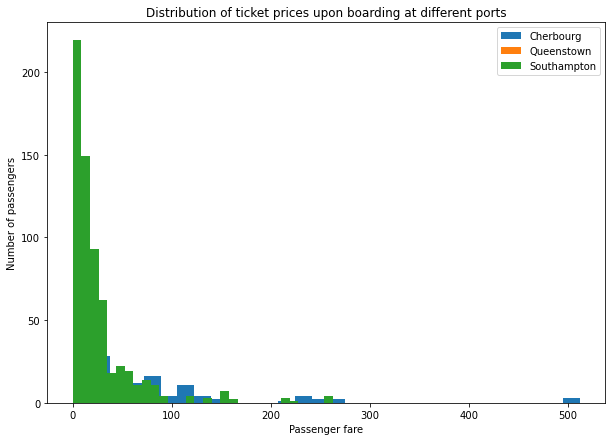

In [27]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of ticket prices upon boarding at different ports')
plt.hist(train_df[train_df['Embarked'] == 'C']['Fare'], bins=30)
plt.hist(train_df[train_df['Embarked'] == 'Q']['Fare'], bins=30)
plt.hist(train_df[train_df['Embarked'] == 'S']['Fare'], bins=30)
plt.xlabel('Passenger fare')
plt.ylabel('Number of passengers')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

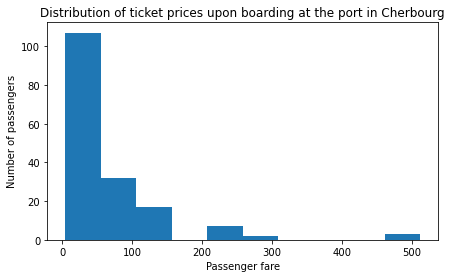

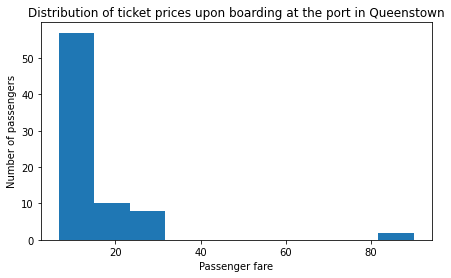

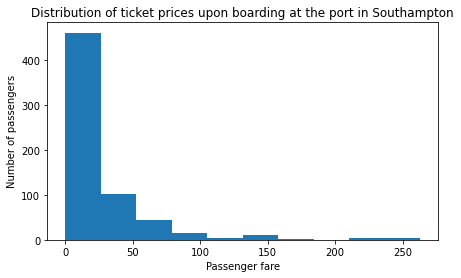

In [28]:
plt.figure(figsize=(7, 4))
plt.title('Distribution of ticket prices upon boarding at the port in Cherbourg')
plt.hist(train_df[train_df['Embarked'] == 'C']['Fare'], bins=10)
plt.xlabel('Passenger fare')
plt.ylabel('Number of passengers')
plt.show()

plt.figure(figsize=(7, 4))
plt.title('Distribution of ticket prices upon boarding at the port in Queenstown')
plt.hist(train_df[train_df['Embarked'] == 'Q']['Fare'], bins=10)
plt.xlabel('Passenger fare')
plt.ylabel('Number of passengers')
plt.show()

plt.figure(figsize=(7, 4))
plt.title('Distribution of ticket prices upon boarding at the port in Southampton')
plt.hist(train_df[train_df['Embarked'] == 'S']['Fare'], bins=10)
plt.xlabel('Passenger fare')
plt.ylabel('Number of passengers')
plt.show()

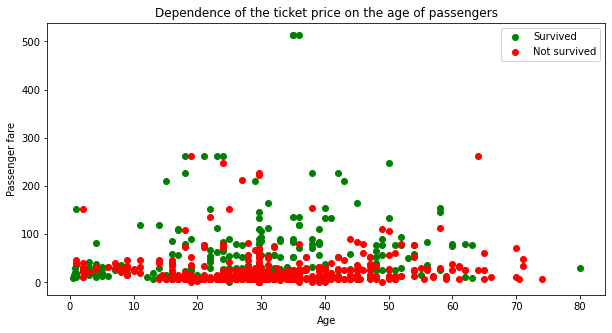

In [29]:
plt.figure(figsize=(10,5))
plt.title('Dependence of the ticket price on the age of passengers')
plt.scatter(train_df[train_df['Survived'] == 1]['Age'], train_df[train_df['Survived'] == 1]['Fare'], color='green')
plt.scatter(train_df[train_df['Survived'] == 0]['Age'], train_df[train_df['Survived'] == 0]['Fare'], color='red')
plt.xlabel('Age')
plt.ylabel('Passenger fare')
plt.legend(['Survived', 'Not survived'])
plt.show()

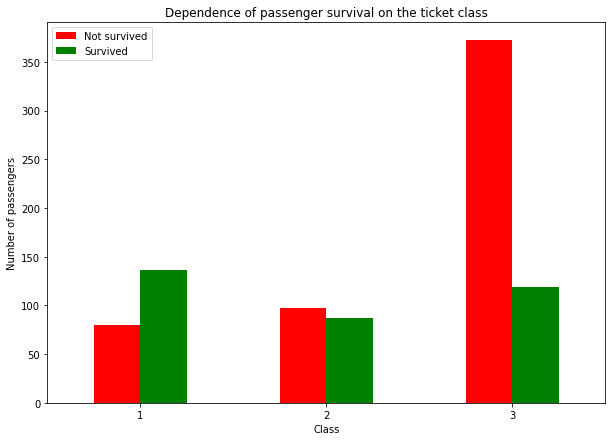

In [30]:
df = train_df.groupby(['Pclass', 'Survived'])['Pclass'].aggregate('count').unstack().plot.bar(rot=0, figsize=(10,7), color=['red', 'green'])
plt.title('Dependence of passenger survival on the ticket class')
plt.xlabel('Class')
plt.ylabel('Number of passengers')
plt.legend(['Not survived', 'Survived'])
plt.show()

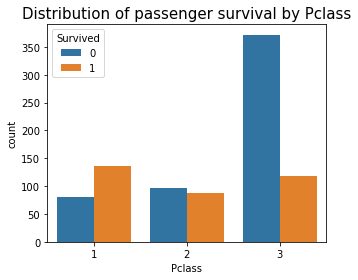

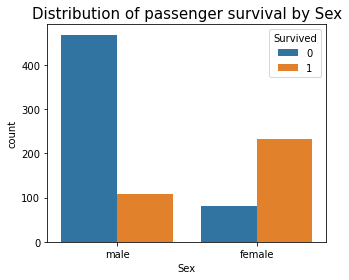

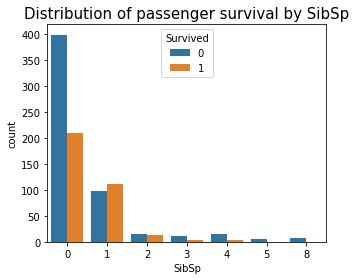

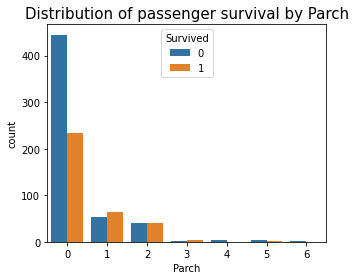

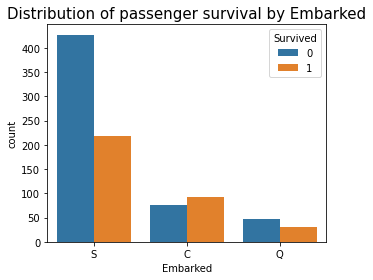

In [31]:
columns = train_df.columns.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'])
df = train_df[columns]

for column in columns.drop('Survived'):
    plt.figure(figsize=(5, 4))
    sns.countplot(x=column, data=df, hue='Survived')
    plt.title(label=f'Distribution of passenger survival by {column}', fontsize=15)

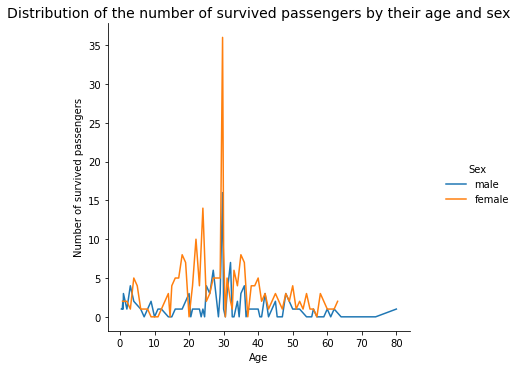

In [32]:
df = train_df.groupby(['Age', 'Sex']).Survived.sum()\
.reset_index().rename({
    'Survived': 'Number of survived passengers'},
    axis=1
)

sns.relplot(data=df,
            x='Age',
            y='Number of survived passengers',
            hue='Sex',
            kind='line')
_ = plt.title('Distribution of the number of survived passengers by their age and sex', dict(size=14))

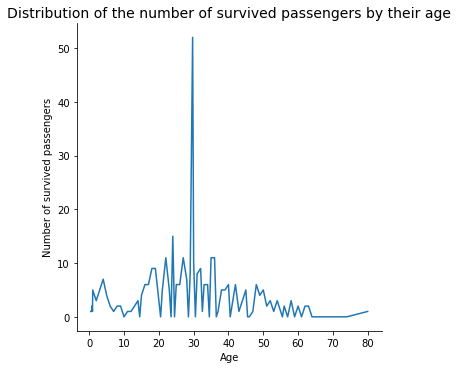

In [33]:
df = train_df.groupby('Age').Survived.sum()\
.reset_index().rename({
    'Survived': 'Number of survived passengers'},
    axis=1
)

sns.relplot(data=df,
            x='Age',
            y='Number of survived passengers',
            kind='line')
_ = plt.title('Distribution of the number of survived passengers by their age', dict(size=14))

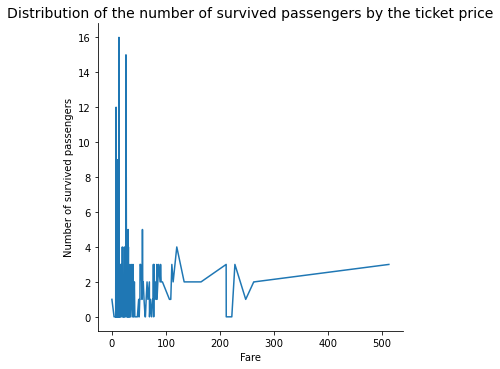

In [34]:
df = train_df.groupby('Fare').Survived.sum()\
.reset_index().rename({
    'Survived': 'Number of survived passengers'},
    axis=1
)

sns.relplot(data=df,
            x='Fare',
            y='Number of survived passengers',
            kind='line')
_ = plt.title('Distribution of the number of survived passengers by the ticket price', dict(size=14))

In [35]:
# Creating new features

train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['HasBigFamily'] = (train_df['Family'] > 3).astype(int)
train_df['IsAdult'] = (train_df['Age'] >= 18).astype(int)

In [36]:
# Absolute correlation of features with the target

train_df.drop('Survived', axis=1).corrwith(train_df['Survived']).abs().sort_values(ascending=False)

Pclass          0.338481
Fare            0.257307
IsAdult         0.122239
Parch           0.081629
Age             0.069809
SibSp           0.035322
HasBigFamily    0.029945
Family          0.016639
PassengerId     0.005007
dtype: float64

In [37]:
# Passengers who did not survive depending on their age

print('Number of childen who did not survive:', train_df[(train_df['IsAdult'] == 0) & (train_df['Survived'] == 0)]['IsAdult'].count())
print('Percentage of childen who did not survive: {}%'.format(train_df[(train_df['IsAdult'] == 0) & (train_df['Survived'] == 0)]['IsAdult'].count()/train_df[(train_df['IsAdult'] == 0)]['IsAdult'].count()*100))
print('Number of adults who did not survive:', train_df[(train_df['IsAdult'] == 1) & (train_df['Survived'] == 0)]['IsAdult'].count())
print('Percentage of adults who did not survive: {}%'.format(train_df[(train_df['IsAdult'] == 1) & (train_df['Survived'] == 0)]['IsAdult'].count()/train_df[(train_df['IsAdult'] == 1)]['IsAdult'].count()*100))

Number of childen who did not survive: 52
Percentage of childen who did not survive: 46.017699115044245%
Number of adults who did not survive: 497
Percentage of adults who did not survive: 63.88174807197944%


In [38]:
# Popular names and surnames of passengers

print('The most popular surname:', train_df['Name'].str.split(',', expand=True)[0].describe().top)
print('The most popular surname among women:', train_df[train_df['Sex'] == 'female']['Name'].str.split(',', expand=True)[0].describe().top)
print('The most popular surname among men:', train_df[train_df['Sex'] == 'male']['Name'].str.split(',', expand=True)[0].describe().top)
print('The most popular name among men:', train_df[train_df['Sex'] == 'male']['Name'].str.split(' ', n = 2, expand = True)[2].describe().top)

# In the last request n = 2, as surnames and statuses (Mr.) are separated by spaces, and the name can be complex (include spaces)
# I consider that the name is what is after the comma, but without the status (Mr.)

The most popular surname: Andersson
The most popular surname among women: Andersson
The most popular surname among men: Panula
The most popular name among men: John


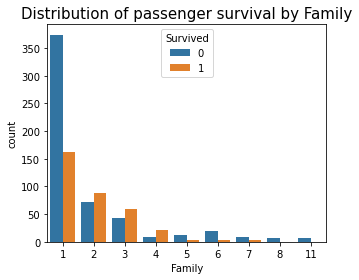

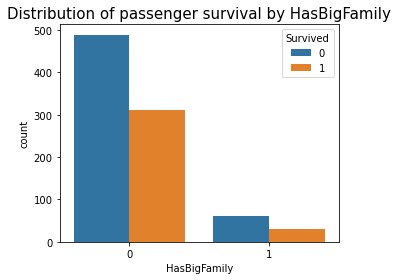

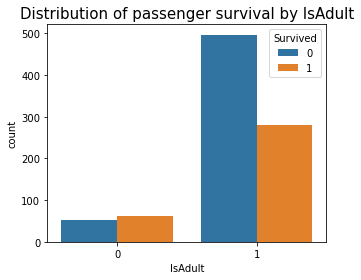

In [39]:
columns = ['Family', 'HasBigFamily', 'IsAdult', 'Survived']
df = train_df[columns]

for column in columns[:-1]:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=column, data=df, hue='Survived')
    plt.title(label=f'Distribution of passenger survival by {column}', fontsize=15)

**Conclusion:**
1. Only 38,38% of passengers survived, of which there were 68,13% females and only 31,87% males, despite the fact that there were less women among the total passengers.
2. Most of the survivors were about 30 years old.
3. Most passengers boarded in Southampton, and there were nearly 2 times more dead passengers, although in other ports the distribution was smoother.
4. Most passengers who died were from the 3 class: 3 times more dead passengers than survivors from the same class.
5. There were more survivors with cheaper tickets.
6. Percentages of survived and dead children are almost the same, while there are around 1,8 times more dead adults than the survived ones. The number of children is almost 10 times less than the number of adults.
7. Passengers from 20 to 60 years preferred more expensive tickets.

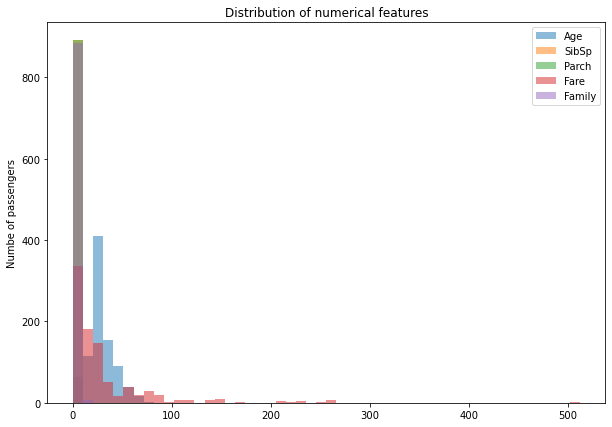

In [40]:
# Distribution of numerical features

columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Family']
df = train_df[columns]
df.plot.hist(figsize=(10, 7), bins=50, alpha=0.5, title='Distribution of numerical features')
plt.ylabel('Numbe of passengers')
plt.legend = columns
plt.show()

Data values of fetures are in different ranges, which is bad from the point of view of machine learning, as it can lead to an uneven distribution of weights.
To solve this problem, data needs to be normalized.
Normalization solves the problem of a large difference in the scale of data so that it is possible to use data from different columns together without large errors.
Normalization creates new data values for numerical columns within the 0-1 scale.

In [41]:
train_df_normalized = pd.DataFrame(preprocessing.normalize(df), columns=columns)

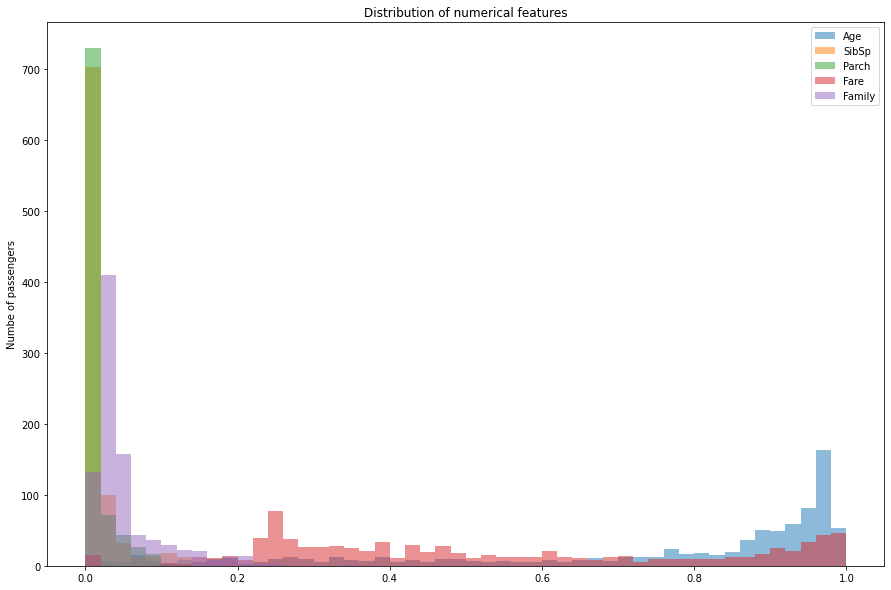

In [42]:
train_df_normalized.plot.hist(figsize=(15, 10), bins=50, alpha=0.5, title='Distribution of numerical features')
plt.ylabel('Numbe of passengers')
plt.legend = columns
plt.show()


## <a id='50'>Split the data</a>  

Let's split the training and validation set. We will use a 80-20 split. Don't forget to fix random_state. 


DecisionTreeClassifier and RandomForestClassifier do not require data normalization or scaling because they use a probability function to train the model and do not use any distance metrics.

In [43]:
#your code is here

train, validation = train_test_split(train_df, test_size=0.2, random_state=42)


## <a id='51'>Build a model</a>  

We will start with a simple model (baseline), with just two features, the `Sex` and `Pclass`. Create DesicionTreeClassifier and RandomForestClassifier, based on this features, without tuning parameters. 

Next, create two more complicated models: DesicionTreeClassifier and RandomForestClassifier with adding at least one feature you found useful as a result of your analysis.

Find accuracy score for all models. Is it a good idea to use accuracy? Any suggestions about metrics? 

Then try to tune at least one parameter for every model using grid search and write down features and parameters, which gave you best score. 

In [44]:
#your code is here

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [45]:
import warnings
warnings.simplefilter('ignore')

DecisionTreeClassifier and RandomForestClassifier do not need complicated encoding of categorical features, so the latter can be just numered, and this will not distort the result. 

In [46]:
train['Sex_1'] = train['Sex'].replace(['male', 'female'], [0, 1])
validation['Sex_1'] = validation['Sex'].replace(['male', 'female'], [0, 1])

In [47]:
X_train = train[['Sex_1', 'Pclass']]
y_train = train['Survived']

X_test = validation[['Sex_1', 'Pclass']]
y_test = validation['Survived']

In [48]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print('Accuracy score for DecisionTreeClassifier:', accuracy_score(y_test, y_pred_tree))
print('Precision score for DecisionTreeClassifier:', precision_score(y_test, y_pred_tree))
print('Recall score for DecisionTreeClassifier:', recall_score(y_test, y_pred_tree))
print('ROC AUC score for DecisionTreeClassifier:', roc_auc_score(y_test, y_pred_tree))
print('f1-score for DecisionTreeClassifier:', f1_score(y_test, y_pred_tree))

Accuracy score for DecisionTreeClassifier: 0.7653631284916201
Precision score for DecisionTreeClassifier: 0.9
Recall score for DecisionTreeClassifier: 0.4864864864864865
ROC AUC score for DecisionTreeClassifier: 0.7241956241956242
f1-score for DecisionTreeClassifier: 0.631578947368421


In [49]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print('Accuracy score for RandomForestClassifier:', accuracy_score(y_test, y_pred_forest))
print('Precision score for RandomForestClassifier:', precision_score(y_test, y_pred_forest))
print('Recall score for RandomForestClassifier:', recall_score(y_test, y_pred_forest))
print('ROC AUC score for RandomForestClassifier:', roc_auc_score(y_test, y_pred_forest))
print('f1-score for RandomForestClassifier:', f1_score(y_test, y_pred_forest))

Accuracy score for RandomForestClassifier: 0.7653631284916201
Precision score for RandomForestClassifier: 0.9
Recall score for RandomForestClassifier: 0.4864864864864865
ROC AUC score for RandomForestClassifier: 0.7241956241956242
f1-score for RandomForestClassifier: 0.631578947368421


Definition of correlation of festures with the target:

In [50]:
# Absolute correlation of features with the target

train_df.drop('Survived', axis=1).corrwith(train_df['Survived']).abs().sort_values(ascending=False)

Pclass          0.338481
Fare            0.257307
IsAdult         0.122239
Parch           0.081629
Age             0.069809
SibSp           0.035322
HasBigFamily    0.029945
Family          0.016639
PassengerId     0.005007
dtype: float64

Adding Fare and IsAdult features, as they have realtively high correlation with the target:

In [51]:
X_train_1 = train[['Sex_1', 'Pclass', 'Fare', 'IsAdult']]
X_test_1 = validation[['Sex_1', 'Pclass', 'Fare', 'IsAdult']]

In [52]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_1, y_train)
y_pred_tree = tree.predict(X_test_1)

print('Accuracy score for DecisionTreeClassifier:', accuracy_score(y_test, y_pred_tree))
print('Precision score for DecisionTreeClassifier:', precision_score(y_test, y_pred_tree))
print('Recall score for DecisionTreeClassifier:', recall_score(y_test, y_pred_tree))
print('ROC AUC score for DecisionTreeClassifier:', roc_auc_score(y_test, y_pred_tree))
print('f1-score for DecisionTreeClassifier:', f1_score(y_test, y_pred_tree))

Accuracy score for DecisionTreeClassifier: 0.8268156424581006
Precision score for DecisionTreeClassifier: 0.8208955223880597
Recall score for DecisionTreeClassifier: 0.7432432432432432
ROC AUC score for DecisionTreeClassifier: 0.8144787644787644
f1-score for DecisionTreeClassifier: 0.7801418439716312


In [53]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_1, y_train)
y_pred_forest = forest.predict(X_test_1)

print('Accuracy score for RandomForestClassifier:', accuracy_score(y_test, y_pred_forest))
print('Precision score for RandomForestClassifier:', precision_score(y_test, y_pred_forest))
print('Recall score for RandomForestClassifier:', recall_score(y_test, y_pred_forest))
print('ROC AUC score for RandomForestClassifier:', roc_auc_score(y_test, y_pred_forest))
print('f1-score for RandomForestClassifier:', f1_score(y_test, y_pred_forest))

Accuracy score for RandomForestClassifier: 0.8324022346368715
Precision score for RandomForestClassifier: 0.8055555555555556
Recall score for RandomForestClassifier: 0.7837837837837838
ROC AUC score for RandomForestClassifier: 0.8252252252252252
f1-score for RandomForestClassifier: 0.7945205479452055


Definition of feature importances with the special funcrion:

In [54]:
train['Embarked_1'] = train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
validation['Embarked_1'] = validation['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

In [55]:
features = ['Sex_1', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked_1', 'IsAdult', 'Family', 'HasBigFamily']
X_train_2 = train[features]
X_test_2 = validation[features]

Feature: Sex_1, importance for DecisionTreeClassifier: 0.3089770430772988
Feature: Pclass, importance for DecisionTreeClassifier: 0.12266586037891462
Feature: Fare, importance for DecisionTreeClassifier: 0.23221439755531084
Feature: Age, importance for DecisionTreeClassifier: 0.21877683571393122
Feature: SibSp, importance for DecisionTreeClassifier: 0.029090880708682605
Feature: Parch, importance for DecisionTreeClassifier: 0.011014175230438317
Feature: Embarked_1, importance for DecisionTreeClassifier: 0.01335712573675098
Feature: IsAdult, importance for DecisionTreeClassifier: 0.0014998257927063842
Feature: Family, importance for DecisionTreeClassifier: 0.05389984356132106
Feature: HasBigFamily, importance for DecisionTreeClassifier: 0.008504012244645183


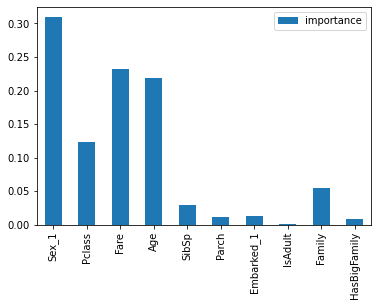

In [56]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_2, y_train)
importances_tree = tree.feature_importances_
df = pd.DataFrame({'importance': importances_tree}, index=features)
df.plot.bar()

for feature, importance in zip(features, importances_tree):
    print('Feature: {}, importance for DecisionTreeClassifier: {}'.format(feature, importance))

Feature: Sex_1, importance for RandomForestClassifier: 0.2716299521506095
Feature: Pclass, importance for RandomForestClassifier: 0.0762709294547036
Feature: Fare, importance for RandomForestClassifier: 0.2560198226348078
Feature: Age, importance for RandomForestClassifier: 0.2320283463474118
Feature: SibSp, importance for RandomForestClassifier: 0.03285632825637675
Feature: Parch, importance for RandomForestClassifier: 0.02189388098195534
Feature: Embarked_1, importance for RandomForestClassifier: 0.03351237289086651
Feature: IsAdult, importance for RandomForestClassifier: 0.017524392057154982
Feature: Family, importance for RandomForestClassifier: 0.05004484372904592
Feature: HasBigFamily, importance for RandomForestClassifier: 0.008219131497067836


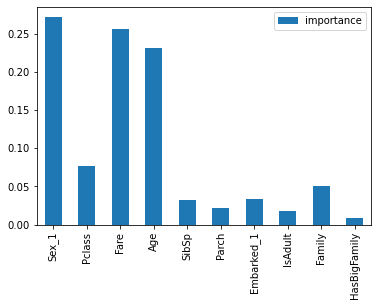

In [57]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_2, y_train)
importances_forest = forest.feature_importances_
df = pd.DataFrame({'importance': importances_forest}, index=features)
df.plot.bar()

for feature, importance in zip(features, importances_forest):
    print('Feature: {}, importance for RandomForestClassifier: {}'.format(feature, importance))


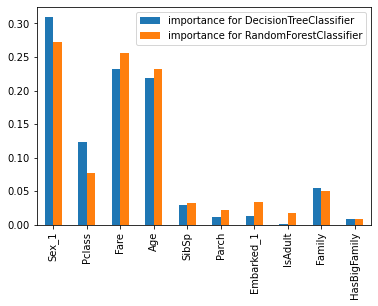

In [58]:
df = pd.DataFrame({'importance for DecisionTreeClassifier': importances_tree, 'importance for RandomForestClassifier': importances_forest}, index=features)
_ = df.plot.bar()

In [59]:
X_train_3 = train[['Sex_1', 'Pclass', 'Fare', 'Age']]
X_test_3 = validation[['Sex_1', 'Pclass', 'Fare', 'Age']]

In [60]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_3, y_train)
y_pred_tree = tree.predict(X_test_3)

print('Accuracy score for DecisionTreeClassifier:', accuracy_score(y_test, y_pred_tree))
print('Precision score for DecisionTreeClassifier:', precision_score(y_test, y_pred_tree))
print('Recall score for DecisionTreeClassifier:', recall_score(y_test, y_pred_tree))
print('ROC AUC score for DecisionTreeClassifier:', roc_auc_score(y_test, y_pred_tree))
print('f1-score for DecisionTreeClassifier:', f1_score(y_test, y_pred_tree))

Accuracy score for DecisionTreeClassifier: 0.7374301675977654
Precision score for DecisionTreeClassifier: 0.6753246753246753
Recall score for DecisionTreeClassifier: 0.7027027027027027
ROC AUC score for DecisionTreeClassifier: 0.7323037323037322
f1-score for DecisionTreeClassifier: 0.6887417218543046


In [61]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_3, y_train)
y_pred_forest = forest.predict(X_test_3)

print('Accuracy score for RandomForestClassifier:', accuracy_score(y_test, y_pred_forest))
print('Precision score for RandomForestClassifier:', precision_score(y_test, y_pred_forest))
print('Recall score for RandomForestClassifier:', recall_score(y_test, y_pred_forest))
print('ROC AUC score for RandomForestClassifier:', roc_auc_score(y_test, y_pred_forest))
print('f1-score for RandomForestClassifier:', f1_score(y_test, y_pred_forest))

Accuracy score for RandomForestClassifier: 0.7932960893854749
Precision score for RandomForestClassifier: 0.7681159420289855
Recall score for RandomForestClassifier: 0.7162162162162162
ROC AUC score for RandomForestClassifier: 0.781917631917632
f1-score for RandomForestClassifier: 0.7412587412587412


In [62]:
tree_parameters = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': range(1, 20),'min_samples_split': range(1, 30, 2)})
tree_parameters.fit(X_train_3, y_train)
tree_parameters.predict(X_test_3)
tree_parameters_best = tree_parameters.best_params_

tree = DecisionTreeClassifier(max_depth=tree_parameters_best['max_depth'], min_samples_split=tree_parameters_best['min_samples_split'])
tree.fit(X_train_3, y_train)
y_pred_tree = tree.predict(X_test_3)

print('Accuracy score for DecisionTreeClassifier:', accuracy_score(y_test, y_pred_tree))
print('Precision score for DecisionTreeClassifier:', precision_score(y_test, y_pred_tree))
print('Recall score for DecisionTreeClassifier:', recall_score(y_test, y_pred_tree))
print('ROC AUC score for DecisionTreeClassifier:', roc_auc_score(y_test, y_pred_tree))
print('f1-score for DecisionTreeClassifier:', f1_score(y_test, y_pred_tree))
print('The best parameters for DecisionTreeClassifier:', tree_parameters_best)

Accuracy score for DecisionTreeClassifier: 0.7932960893854749
Precision score for DecisionTreeClassifier: 0.7846153846153846
Recall score for DecisionTreeClassifier: 0.6891891891891891
ROC AUC score for DecisionTreeClassifier: 0.7779279279279279
f1-score for DecisionTreeClassifier: 0.7338129496402878
The best parameters for DecisionTreeClassifier: {'max_depth': 3, 'min_samples_split': 23}


In [63]:
from sklearn.tree import plot_tree

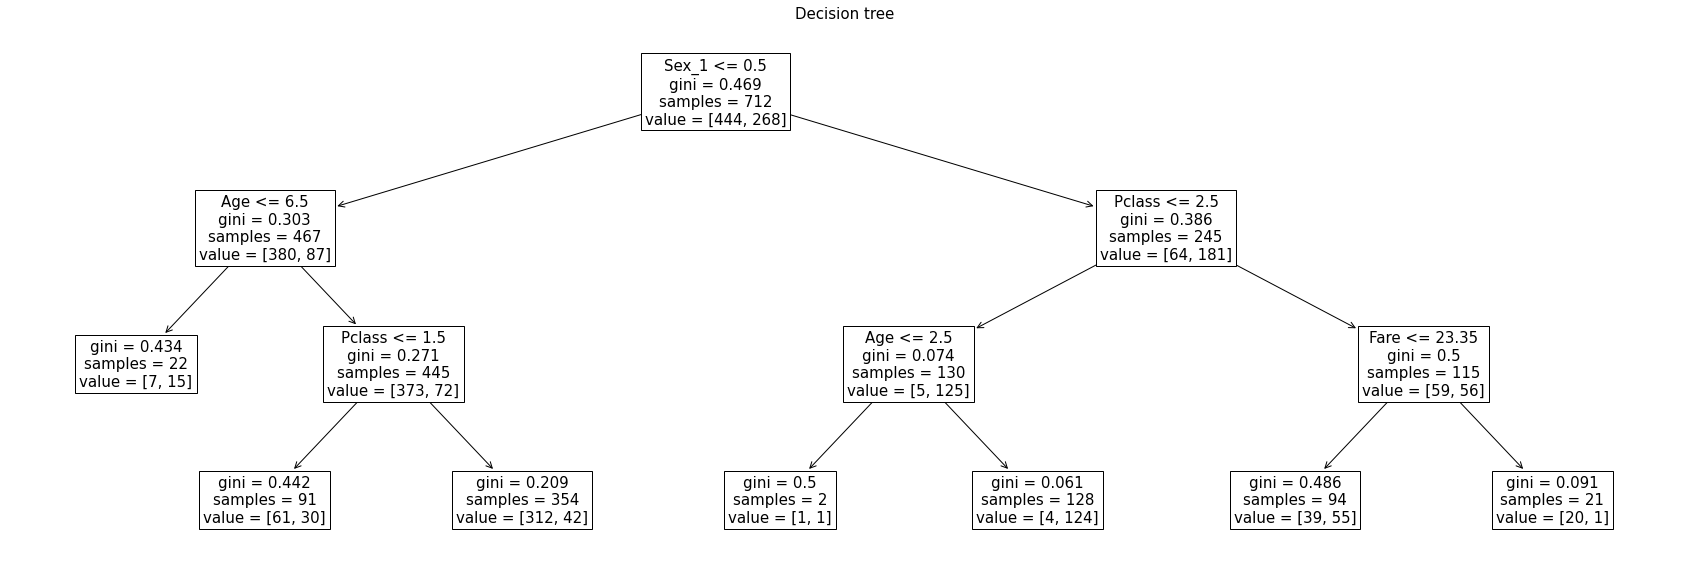

In [64]:
plt.figure(figsize=(30,10))
plot_tree(tree, feature_names=['Sex_1', 'Pclass', 'Fare', 'Age'], fontsize = 15)
plt.title('Decision tree', fontsize = 15);

In [65]:
forest_parameters = GridSearchCV(RandomForestClassifier(random_state=42), param_grid={'n_estimators': range(10, 100, 5), 'max_depth': range(1, 20),'min_samples_split': range(1, 30, 2)})
forest_parameters.fit(X_train_3, y_train)
forest_parameters.predict(X_test_3)
forest_parameters_best = forest_parameters.best_params_

forest = RandomForestClassifier(n_estimators=forest_parameters_best['n_estimators'], max_depth=forest_parameters_best['max_depth'], min_samples_split=forest_parameters_best['min_samples_split'])
forest.fit(X_train_3, y_train)
y_pred_forest = tree.predict(X_test_3)

print('Accuracy score for RandomForestClassifier:', accuracy_score(y_test, y_pred_forest))
print('Precision score for RandomForestClassifier:', precision_score(y_test, y_pred_forest))
print('Recall score for RandomForestClassifier:', recall_score(y_test, y_pred_forest))
print('ROC AUC score for RandomForestClassifier:', roc_auc_score(y_test, y_pred_forest))
print('f1-score for RandomForestClassifier:', f1_score(y_test, y_pred_forest))
print('The best parameters for RandomForestClassifier:', forest_parameters_best)

Accuracy score for RandomForestClassifier: 0.7932960893854749
Precision score for RandomForestClassifier: 0.7846153846153846
Recall score for RandomForestClassifier: 0.6891891891891891
ROC AUC score for RandomForestClassifier: 0.7779279279279279
f1-score for RandomForestClassifier: 0.7338129496402878
The best parameters for RandomForestClassifier: {'max_depth': 13, 'min_samples_split': 19, 'n_estimators': 30}


**Conclusion:**
1. Accuracy shows the proportion of correct predictions of the algorithm out of all predictions, this metric is useless in tasks with unequal classes.
2. Precision shows the proportion of really positive objects out of all objects considered as positive by the classifier.
3. Recall demonstrates the proportion of positive objects that are found by the algorithm out of all positive objects.
4. Precision and Recall do not depend on proportion of classes, that is why these metrics are applicable to unbalanced samples of data.
5. ROC AUC is the area under the curve of errors which takes into account both Precision and Recall metrics.
6. F1-score is a weighted harmonic mean of Precision and Recall scores, so it also takes into consideration these both metrics.

Checking predictions on test data:

In [66]:
test_df['Sex_1'] = test_df['Sex'].replace(['male', 'female'], [0, 1])

In [67]:
test_df_new = test_df[['Sex_1', 'Pclass', 'Fare', 'Age']]

In [68]:
tree_test = DecisionTreeClassifier(max_depth=tree_parameters_best['max_depth'], min_samples_split=tree_parameters_best['min_samples_split'])
tree_test.fit(X_train_3, y_train)
y_pred_tree_test = tree_test.predict(test_df_new)

In [69]:
test_df['Survived_predicted_tree'] = y_pred_tree_test

In [70]:
forest_test = RandomForestClassifier(n_estimators=forest_parameters_best['n_estimators'], max_depth=forest_parameters_best['max_depth'], min_samples_split=forest_parameters_best['min_samples_split'])
forest_test.fit(X_train_3, y_train)
y_pred_forest_test = tree.predict(test_df_new)

In [71]:
test_df['Survived_predicted_forest'] = y_pred_forest_test

In [72]:
test_df[['Survived_predicted_tree', 'Survived_predicted_forest']].value_counts()

Survived_predicted_tree  Survived_predicted_forest
0                        0                            266
1                        1                            152
dtype: int64

According to results above, all the predictions on test data by DecisionTreeClassifier and RandomForestClassifier match.

One hot encoding for categorical features can be used by OneHotEncoder or get_dummies:

In [85]:
sex = pd.get_dummies(train_df['Sex'])

In [98]:
train_df_encoding = pd.concat((sex, train_df[['Pclass', 'Fare', 'Age']]), axis=1)

In [99]:
train_df_encoding

,female,male,Pclass,Fare,Age
0,0,1,3,7.2500,22.000000
1,1,0,1,71.2833,38.000000
2,1,0,3,7.9250,26.000000
3,1,0,1,53.1000,35.000000
4,0,1,3,8.0500,35.000000
...,...,...,...,...,...
886,0,1,2,13.0000,27.000000
887,1,0,1,30.0000,19.000000
888,1,0,3,23.4500,29.699118
889,0,1,1,30.0000,26.000000


In [101]:
X_train_4, X_test_4 = train_test_split(train_df_encoding, test_size=0.2, random_state=42)

In [103]:
tree_parameters = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid={'max_depth': range(1, 20),'min_samples_split': range(1, 30, 2)})
tree_parameters.fit(X_train_4, y_train)
tree_parameters.predict(X_test_4)
tree_parameters_best = tree_parameters.best_params_

tree = DecisionTreeClassifier(max_depth=tree_parameters_best['max_depth'], min_samples_split=tree_parameters_best['min_samples_split'])
tree.fit(X_train_4, y_train)
y_pred_tree = tree.predict(X_test_4)

print('Accuracy score for DecisionTreeClassifier:', accuracy_score(y_test, y_pred_tree))
print('Precision score for DecisionTreeClassifier:', precision_score(y_test, y_pred_tree))
print('Recall score for DecisionTreeClassifier:', recall_score(y_test, y_pred_tree))
print('ROC AUC score for DecisionTreeClassifier:', roc_auc_score(y_test, y_pred_tree))
print('f1-score for DecisionTreeClassifier:', f1_score(y_test, y_pred_tree))
print('The best parameters for DecisionTreeClassifier:', tree_parameters_best)

Accuracy score for DecisionTreeClassifier: 0.7932960893854749
Precision score for DecisionTreeClassifier: 0.7846153846153846
Recall score for DecisionTreeClassifier: 0.6891891891891891
ROC AUC score for DecisionTreeClassifier: 0.7779279279279279
f1-score for DecisionTreeClassifier: 0.7338129496402878
The best parameters for DecisionTreeClassifier: {'max_depth': 3, 'min_samples_split': 23}


In [104]:
forest_parameters = GridSearchCV(RandomForestClassifier(random_state=42), param_grid={'n_estimators': range(10, 100, 5), 'max_depth': range(1, 20),'min_samples_split': range(1, 30, 2)})
forest_parameters.fit(X_train_4, y_train)
forest_parameters.predict(X_test_4)
forest_parameters_best = forest_parameters.best_params_

forest = RandomForestClassifier(n_estimators=forest_parameters_best['n_estimators'], max_depth=forest_parameters_best['max_depth'], min_samples_split=forest_parameters_best['min_samples_split'])
forest.fit(X_train_4, y_train)
y_pred_forest = tree.predict(X_test_4)

print('Accuracy score for RandomForestClassifier:', accuracy_score(y_test, y_pred_forest))
print('Precision score for RandomForestClassifier:', precision_score(y_test, y_pred_forest))
print('Recall score for RandomForestClassifier:', recall_score(y_test, y_pred_forest))
print('ROC AUC score for RandomForestClassifier:', roc_auc_score(y_test, y_pred_forest))
print('f1-score for RandomForestClassifier:', f1_score(y_test, y_pred_forest))
print('The best parameters for RandomForestClassifier:', forest_parameters_best)

Accuracy score for RandomForestClassifier: 0.7932960893854749
Precision score for RandomForestClassifier: 0.7846153846153846
Recall score for RandomForestClassifier: 0.6891891891891891
ROC AUC score for RandomForestClassifier: 0.7779279279279279
f1-score for RandomForestClassifier: 0.7338129496402878
The best parameters for RandomForestClassifier: {'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 75}
